In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
data=pd.read_csv('spam.csv')

In [34]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [36]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
data.shape

(5572, 2)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [39]:
data.head()
#spam=0
#ham=1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
data.rename(columns={'v1':'Category','v2':'Message'},inplace=True)

In [41]:
data.sample(5)

,Category,Message
2594,ham,"That‰Û÷s the thing with apes, u can fight to t..."
1728,ham,As per your request 'Maangalyam (Alaipayuthe)'...
686,ham,Every King Was Once A Crying Baby And Every Gr...
1012,ham,I dunno they close oredi not... ÌÏ v ma fan...
299,ham,Need a coffee run tomo?Can't believe it's that...


In [43]:
data.loc[data['Category']=='spam','Category',]=0
data.loc[data['Category']=='ham','Category',]=1

In [44]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [47]:
data.duplicated().sum()

403

In [48]:

data = data.drop_duplicates(keep='first')

In [49]:
data.duplicated().sum()

0

In [50]:
data.shape

(5169, 2)

In [51]:
data['Category'].value_counts()

Category
1    4516
0     653
Name: count, dtype: int64

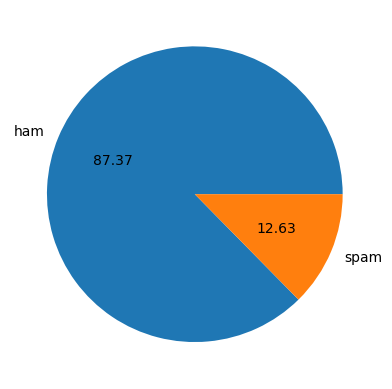

In [52]:
plt.pie(data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [54]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tanisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
data['num_characters'] = data['Message'].apply(len)

In [60]:
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [61]:
data.head()

,Category,Message,num_characters,num_words
0,1,"Go until jurong point, crazy.. Available only ...",111,23
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [62]:
data['num_sentences'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [63]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,23,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [65]:
data[data['Category']==0][['num_characters','num_words','num_sentences']].describe()
#spam =0

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [91]:
data[data['Category'] == 1][['num_characters','num_words','num_sentences']].describe()
#ham=1

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

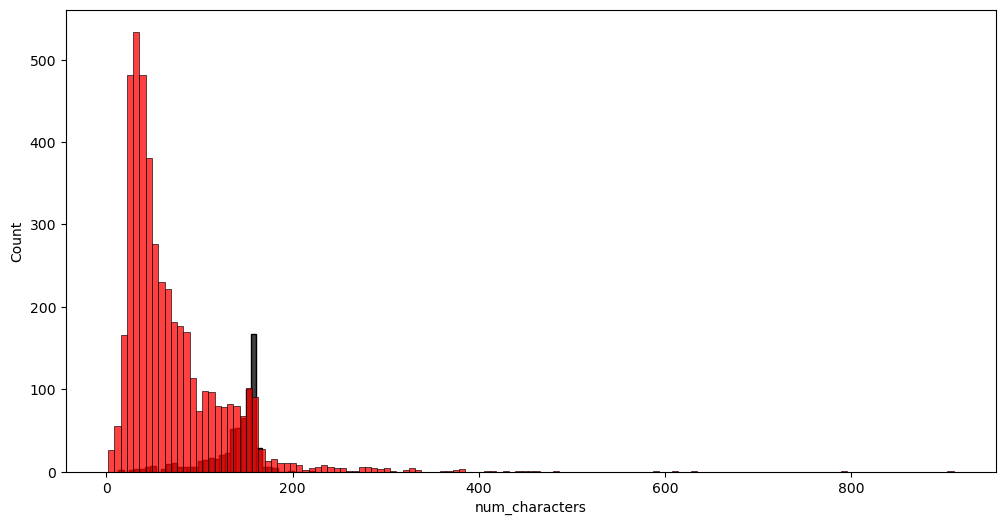

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category'] == 0]['num_characters'],color='black')
sns.histplot(data[data['Category'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

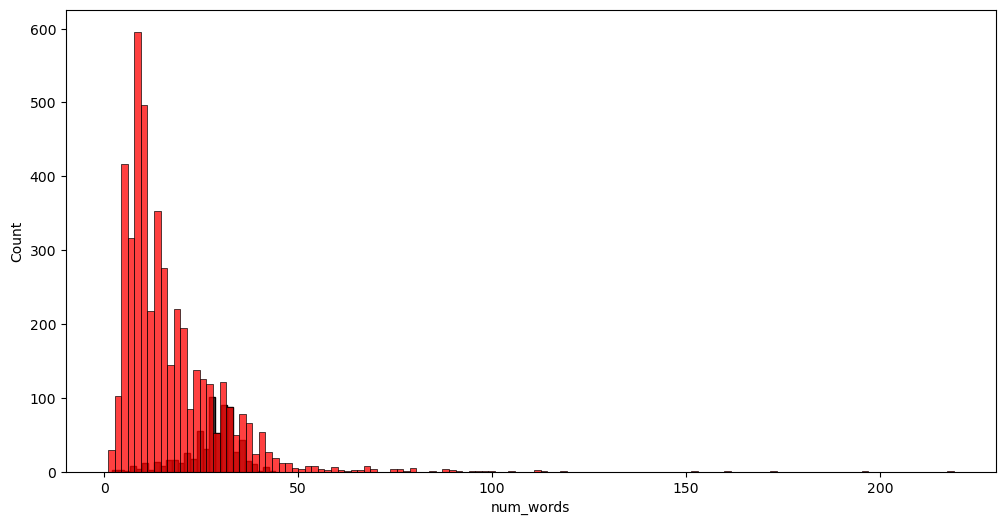

In [71]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category'] == 0]['num_words'],color='black')
sns.histplot(data[data['Category'] == 1]['num_words'],color='red')

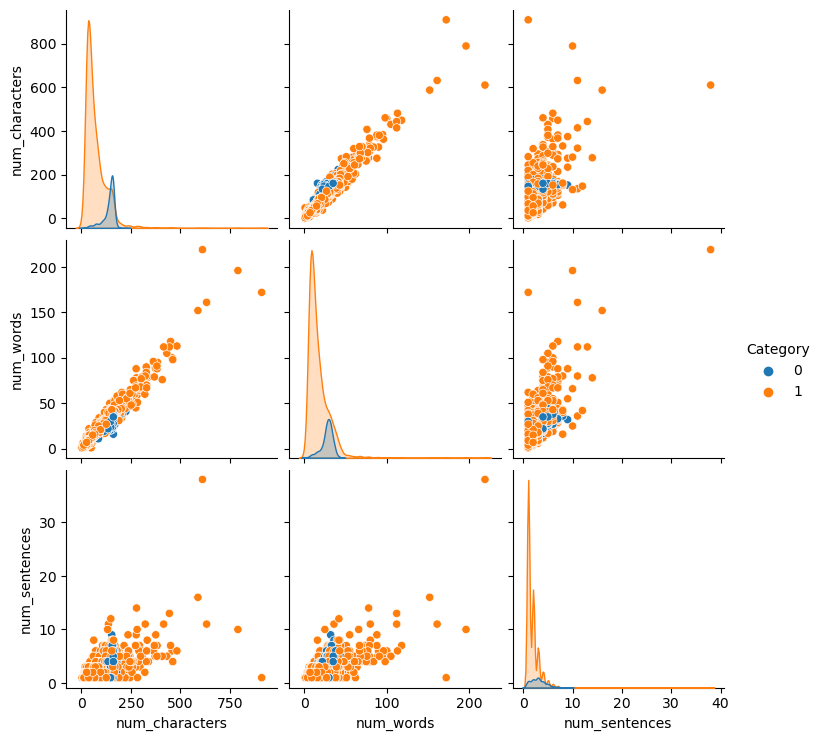

In [73]:
sns.pairplot(data,hue='Category')

In [87]:
x=data['Message']
y=data['Category']

In [13]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [14]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [16]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [19]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# Convert Y_train and Y_test values as integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [20]:
print(x_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [21]:
print(x_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [22]:
model=LogisticRegression()

In [23]:
model.fit(x_train_features,y_train)

LogisticRegression()

In [24]:
pred=model.predict(x_train_features)
accur=accuracy_score(y_train,pred)

In [25]:
print('Accuracy on training data: ',accur)

Accuracy:  0.9661207089970832


In [26]:
predtest=model.predict(x_test_features)
accurtest=accuracy_score(y_test,predtest)

In [27]:
print("Accuracy on test data: ",accurtest)

Accuracy on test data:  0.9623318385650225


In [97]:
email=["Ok lar... Joking wif u oni.."]

inputdatafeat=feature_extraction.transform(email)
prediction=model.predict(inputdatafeat)
print(prediction)
if(prediction[0]==1):
    print("NOT SPAM")
else:
    print("SPAM")

[0]
SPAM
